 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

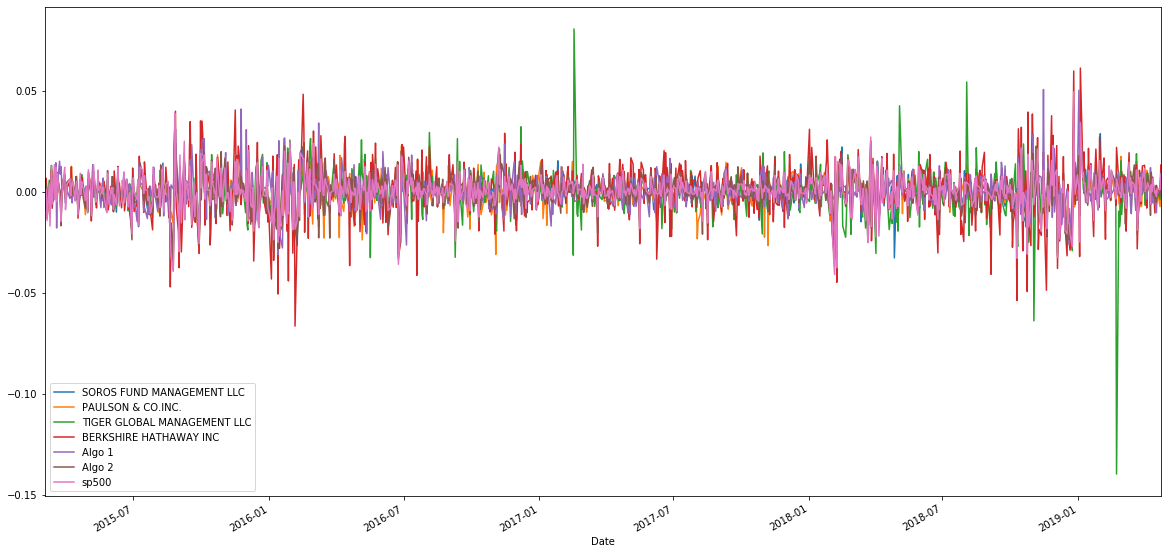

In [15]:
# Plot daily returns
df_daily.plot(figsize = (20,10))

It seems Tiger has some one-day volitilities, and so as BHI.

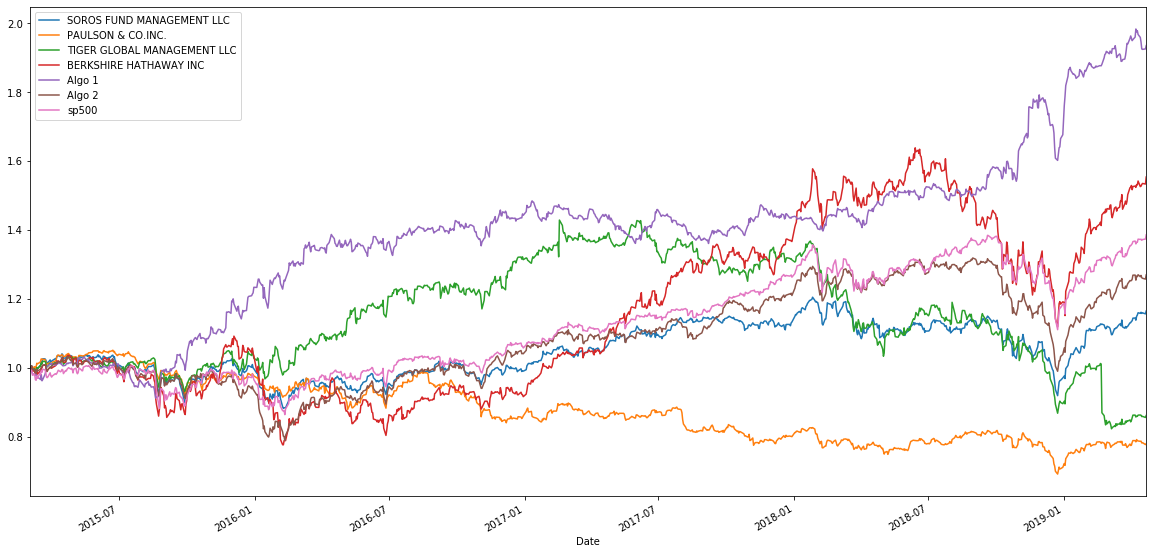

In [16]:
# Plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

Algo 1's return is leading, followed by BHI.

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

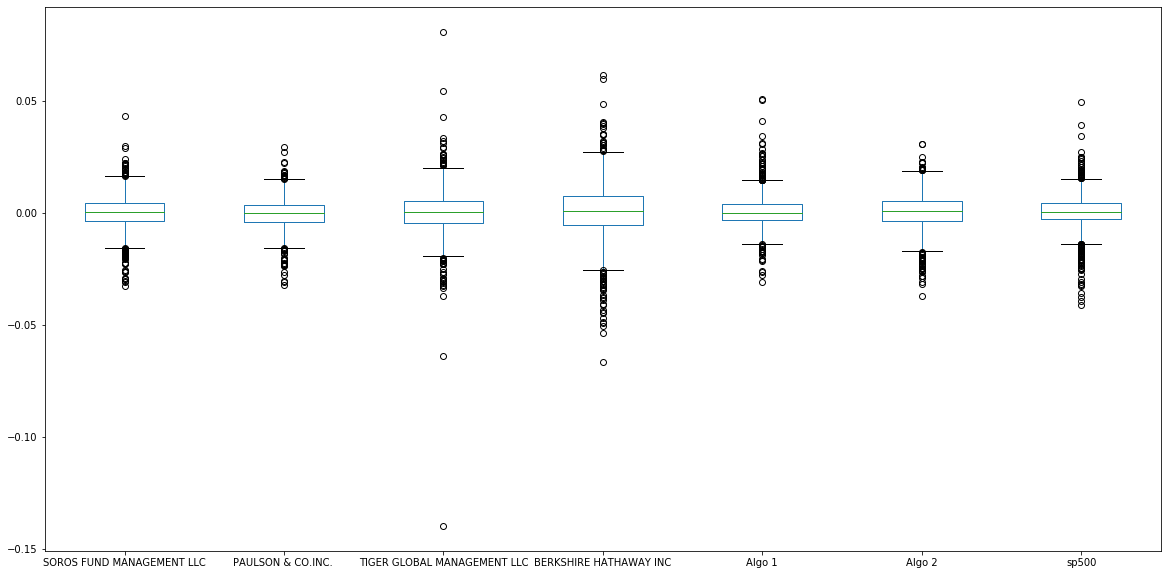

In [17]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [19]:
# Determine which portfolios are riskier than the S&P 500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


Tiger and BHI have higher volitility than SP500.

In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

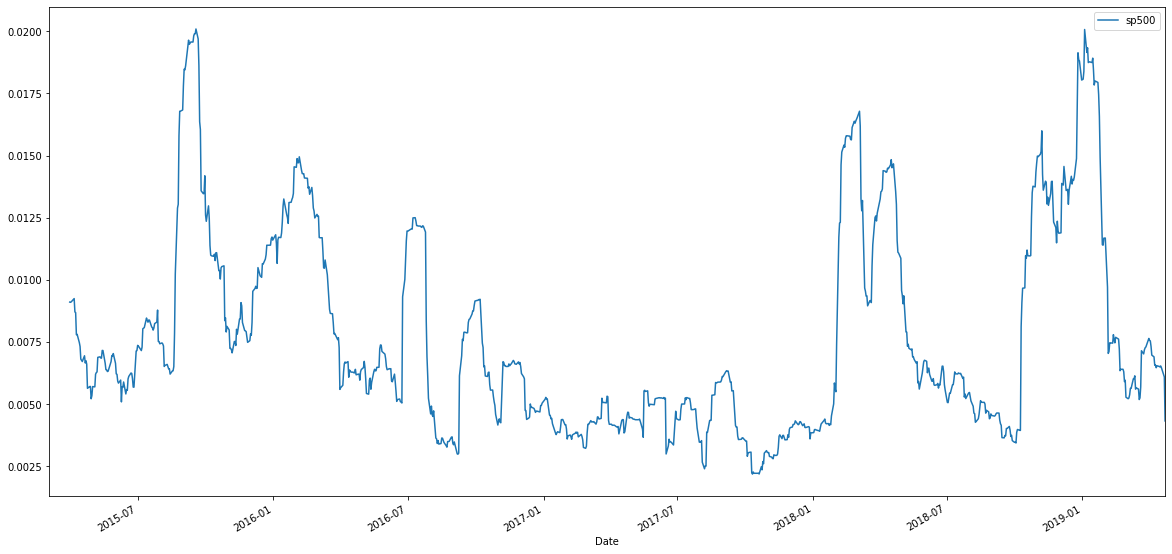

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

In [22]:
# Correlation
correlation_sp500 = pd.DataFrame(df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

Algo 2    0.858764
Name: sp500, dtype: float64

Algo 2 best mimic SP500 since it has the best correlation to SP500, as visualized in chart below.

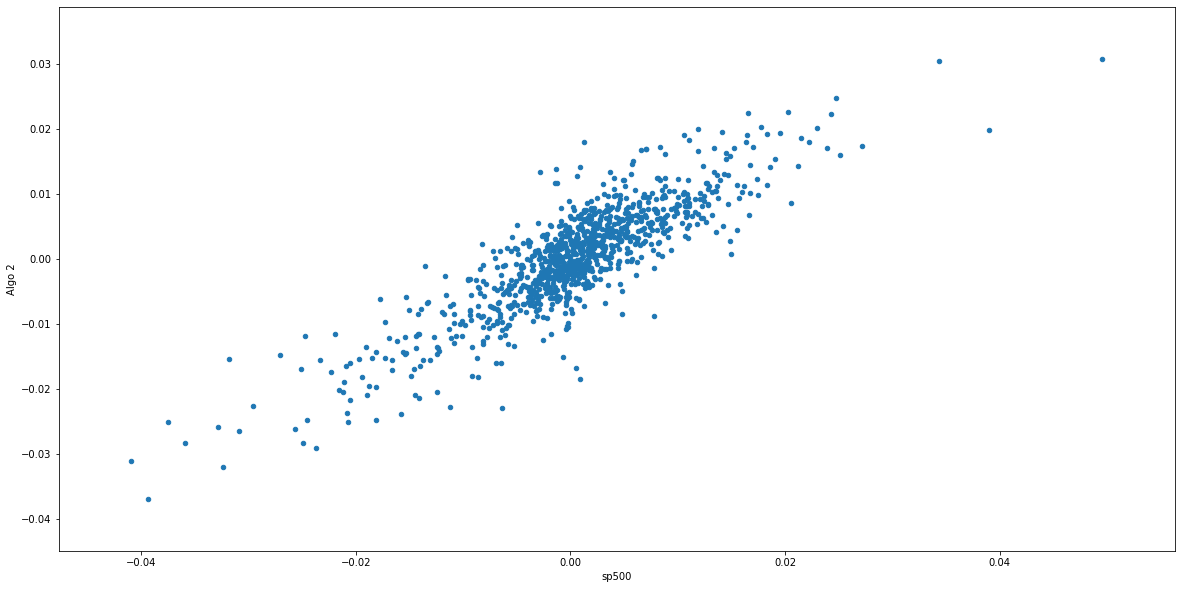

In [23]:
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

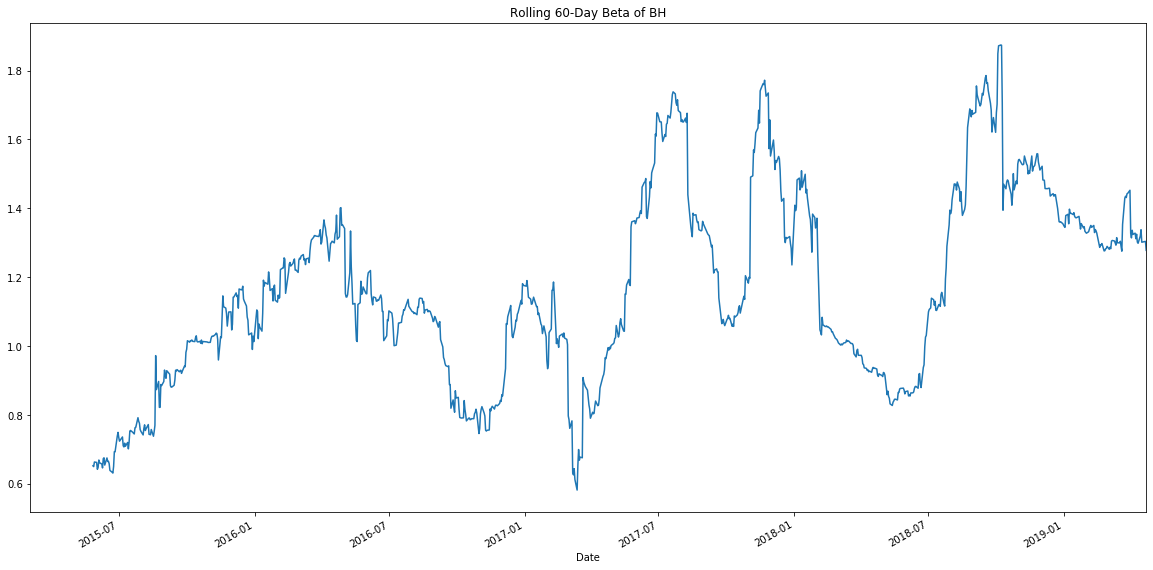

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['sp500'])
rolling_variance = df_daily['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

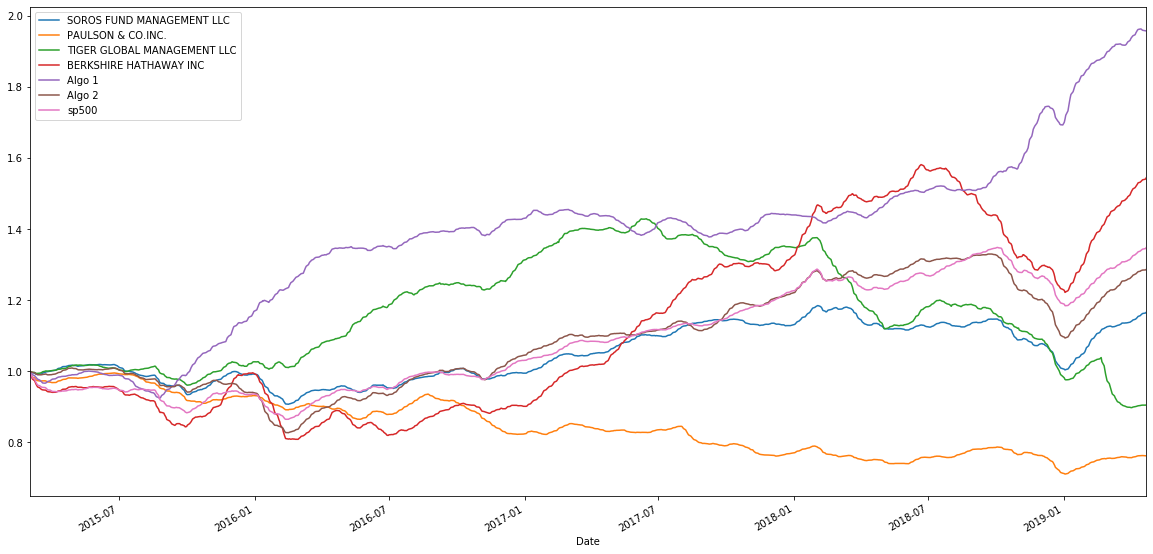

In [25]:
df_daily_ewm = df_daily.ewm(span = 21,adjust = False).mean()
(1+df_daily_ewm).cumprod().plot(figsize = (20,10))

Still, we see the Algo 1 has the highest return, but the curve is smoother due to the moving average.

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [26]:
# Annualzied Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/(df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

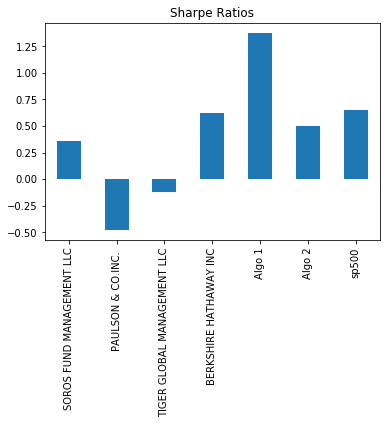

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

Algo 1 outperformed market and whales while algo 2 fell below market and BHI.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
aapl_history = pd.read_csv(Path("Resources/Apple_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

,aapl
Date,
2018-01-02 16:00:00,172.26
2018-01-03 16:00:00,172.23
2018-01-04 16:00:00,173.03
2018-01-05 16:00:00,175.00
2018-01-08 16:00:00,174.35


In [29]:
# Read the second stock
amzn_history = pd.read_csv(Path("Resources/Amazon_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
amzn_history.rename(columns = {"Close":"amzn"}, inplace = True)
amzn_history.head()

,amzn
Date,
2018-01-02 16:00:00,1189.01
2018-01-03 16:00:00,1204.20
2018-01-04 16:00:00,1209.59
2018-01-05 16:00:00,1229.14
2018-01-08 16:00:00,1246.87


In [30]:
# Read the third stock
goog_history = pd.read_csv(Path("Resources/Google_StockPrice.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head()

,goog
Date,
2018-01-02 16:00:00,1065.00
2018-01-03 16:00:00,1082.48
2018-01-04 16:00:00,1086.40
2018-01-05 16:00:00,1102.23
2018-01-08 16:00:00,1106.94


In [31]:
# Concatenate all stocks into a single DataFrame
my_stocks = pd.concat((aapl_history, amzn_history, goog_history), axis = 1, join= "inner")
my_stocks.sort_index(ascending = True, inplace = True)
my_stocks.head()

,aapl,amzn,goog
Date,,,
2018-01-02 16:00:00,172.26,1189.01,1065.00
2018-01-03 16:00:00,172.23,1204.20,1082.48
2018-01-04 16:00:00,173.03,1209.59,1086.40
2018-01-05 16:00:00,175.00,1229.14,1102.23
2018-01-08 16:00:00,174.35,1246.87,1106.94


In [32]:
# Reset the index
my_stocks.index = my_stocks.index.normalize()

In [33]:
# Drop Nulls
my_stocks.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
my_portfolio = my_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

Date
2018-01-03    0.013453
2018-01-04    0.004112
2018-01-05    0.015127
2018-01-08    0.008694
2018-01-09    0.002029
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
portfolio_returns = pd.concat((my_portfolio_returns,df_daily), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.013453,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.004112,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.015127,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.008694,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.002029,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2018-12-21,-0.045431,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.020588
2018-12-24,-0.016234,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112
2018-12-26,0.081281,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-01-03,0.013453,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,0.004112,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.015127,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.008694,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.002029,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303
...,...,...,...,...,...,...,...,...
2018-12-21,-0.045431,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.020588
2018-12-24,-0.016234,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112
2018-12-26,0.081281,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.019167
SOROS FUND MANAGEMENT LLC,0.009947
PAULSON & CO.INC.,0.007438
TIGER GLOBAL MANAGEMENT LLC,0.012531
BERKSHIRE HATHAWAY INC,0.015190
Algo 1,0.007568
Algo 2,0.009013
sp500,0.010757


In [38]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
higher_std

,std
my_portfolio,0.019167
TIGER GLOBAL MANAGEMENT LLC,0.012531
BERKSHIRE HATHAWAY INC,0.015190


My portfolio is the riskiest in all portfolio.

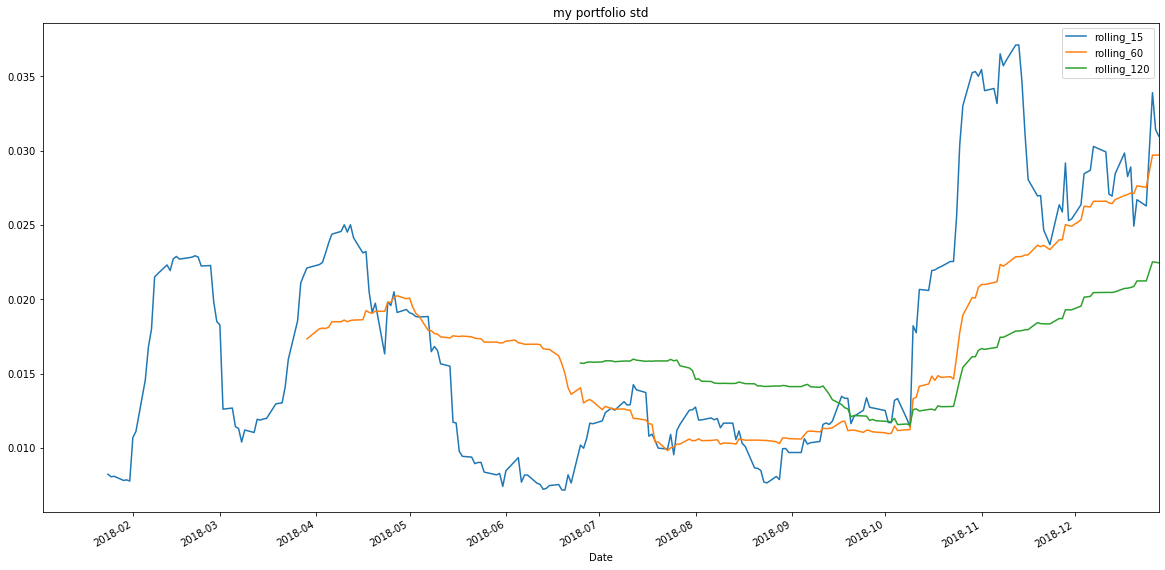

In [39]:
# Rolling
my_portfolio_rolling_15 = portfolio_returns[["my_portfolio"]].rolling(window = 15).std()
my_portfolio_rolling_60 = portfolio_returns[["my_portfolio"]].rolling(window = 60).std()
my_portfolio_rolling_120 = portfolio_returns[["my_portfolio"]].rolling(window = 120).std()
ax = my_portfolio_rolling_15.plot(figsize = (20,10), title = 'my portfolio std')
my_portfolio_rolling_60.plot(ax = ax)
my_portfolio_rolling_120.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

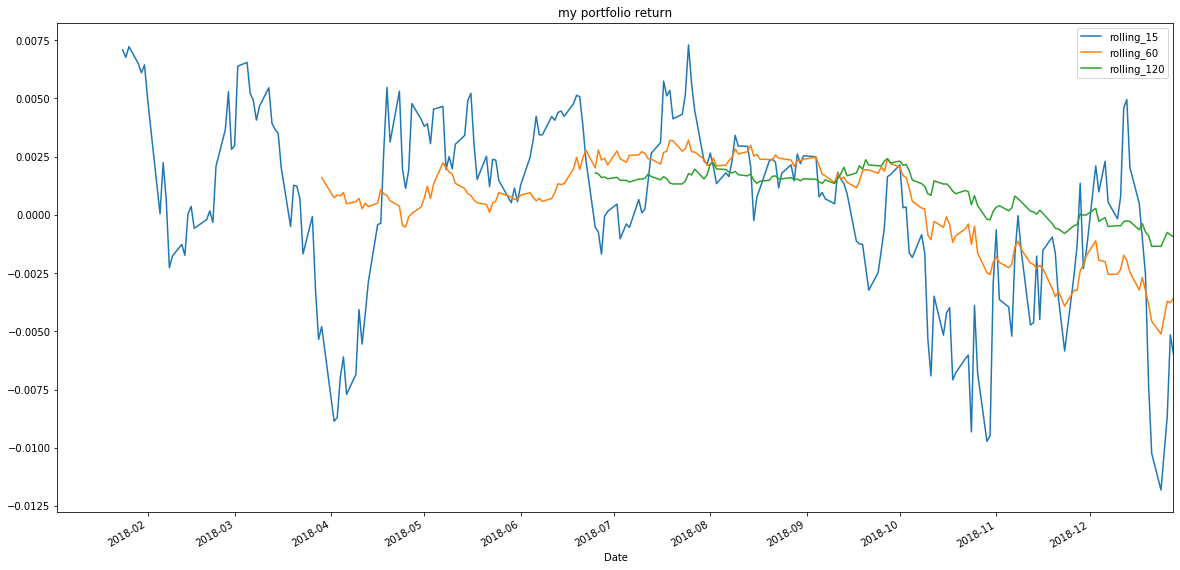

In [40]:
my_portfolio_rolling_15_return = portfolio_returns[["my_portfolio"]].rolling(window = 15).mean()
my_portfolio_rolling_60_return = portfolio_returns[["my_portfolio"]].rolling(window = 60).mean()
my_portfolio_rolling_120_return = portfolio_returns[["my_portfolio"]].rolling(window = 120).mean()
ax = my_portfolio_rolling_15_return.plot(figsize = (20,10), title = 'my portfolio return')
my_portfolio_rolling_60_return.plot(ax = ax)
my_portfolio_rolling_120_return.plot(ax = ax)
ax.legend(['rolling_15','rolling_60','rolling_120'])

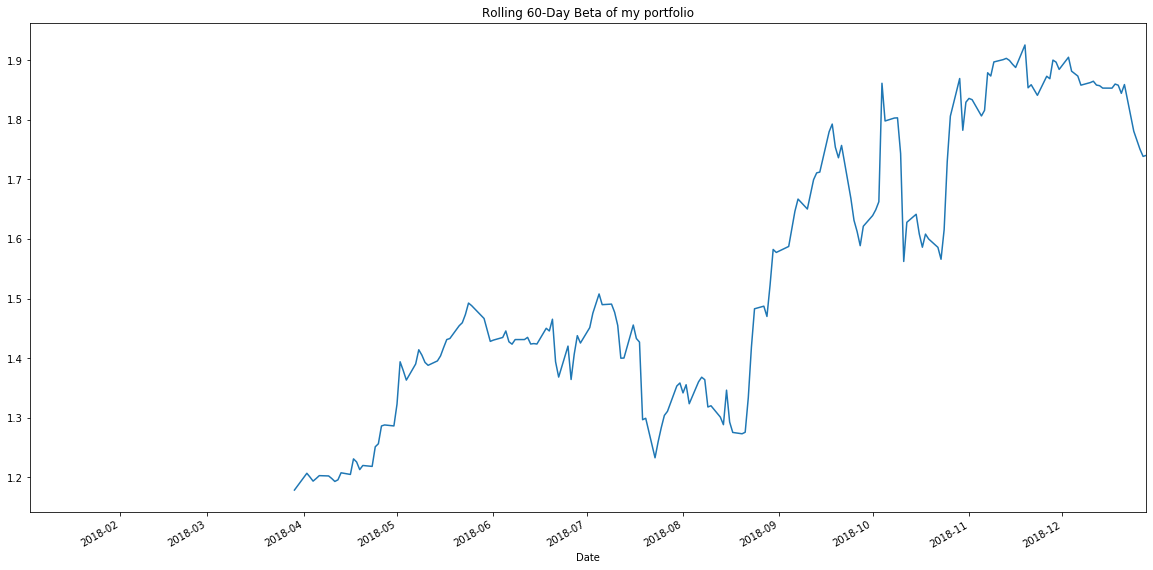

In [41]:
# Beta
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

In [42]:
# Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

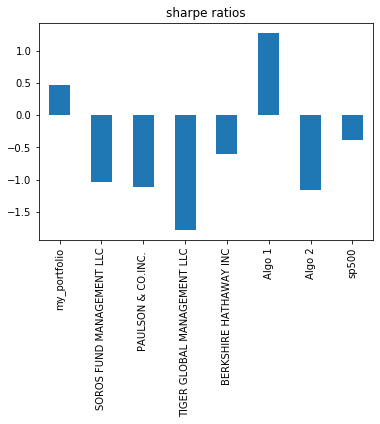

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

My portfolio is performing OK in 2018, only trailing Algo 1, but beating all other portfolios.

## Include correlation analysis to determine which stocks (if any) are correlated

In [44]:
correlation_my_portfolio = portfolio_returns.corr().loc[:,"my_portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]

BERKSHIRE HATHAWAY INC    0.864249
Name: my_portfolio, dtype: float64

My portfolio is highly correlated to BHI.